# KNN 연구과제

## 문제 3

아래의 데이터는 흡연 여부에 따른 다양한 검사결과 수치이다. 이 데이터를 토대로 흡연 여부를 판별할 수 있는 분류 모형을 로지스틱 회귀와 KNN 분류 모형으로 구현하고 더 좋은 성능을 보이는 분류 모형과 성능 평가 지표를 제시하시오.

> https://data.hossam.kr/mldata/smoker_status.xlsx

> https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction

| 필드명 | 설명  |
|---|---|
| id | 고유 식별 번호 |
| age | 나이 |
| height(cm) | 키 |
| weight(kg) | 몸무게 |
| waist(cm) | 허리둘레 |
| eyesight(left) | 시력(왼쪽) |
| eyesight(right) | 시력(오른쪽) |
| hearing(left) | 청력(왼쪽) |
| hearing(right) | 청력(오른쪽) |
| systolic | 수축기 혈압(mmHg 단위) |
| relaxation | 휴식 혈압(mmHg 단위) |
| fasting blood sugar | 공복 혈당 수치(mg/dL 단위) |
| Cholesterol | 콜레스테롤 수치(mg/dL 단위) |
| triglyceride | 중성지방 수치(mg/dL 단위) |
| HDL | 고밀도 지단백 수치 (mg/dL) |
| LDL | 저밀도 지단백 수치 (mg/dL) |
| hemoglobin | 헤모글로빈 수치(g/dL) |
| Urine protein | 소변내 단백질 수준 |
| serum creatinine | 혈청 크레아티닌 수치(mg/dL) |
| AST | 아스파르트 아미노전이효소(AST) 수준 |
| ALT | 알라닌아미노 전이효소 수준 |
| Gtp | 감마-글루타밀 전이효소 수준 |
| dental caries | 1인당 치아우식증 유무를 나타내는 값(0: 없음, 1: 있음) |
| smoking | 흡연상태(0: 비흡연자, 1: 흡연자) |


> 다양한 시도의 결과물을 따로 저장해두자

|스케일링|이상치 제거|변수 제거|
|--|--|--|
|X|X|X|
|O|X|X|
|O|O|X|
|O|O|O|

> 데이터 전처리 아이디어
 
> 데이터를 하나 더 추가해서 남자/여자 분류해볼 수 있지 않을까? 


    BMI = kg/m^2 (몸무게/키*0.01^2)   과체중, 비만
    Hypertension: 저혈압, 고혈압전단계, 고혈압, 
    serum creatinine: 정상(0.5-1.4 mg/dL)
    AST:
    ALT:
    
    **BMI 

<18.5 : underweight
18.5 - 25 : healthy weight
25.0 - <30 : overweight
30.0 - 35 : Class 1 obesity
35 - 40: Class 2 obesity
>= 40 : Class 3 obesity

GFR (Cockroft-Gault, ml/min/1.73m2)

(140-나이)*체중/(72*P_{cr})
(*0.85: 여자의 경우)
정상치: 150-180L/day (100-120mL/min)




Cr (mg/dL)
- 정상: 0.5-0.9 (여성), 0.6-1.4 (남성)
- 사구체 여과율과 반비례
- 근육량과 연관됨 

Total Protein (g/dL) : 일반 혈액 검사
- 정상범위: 6.6-8.7
- 참고치 초과시: 자가면역질환, 감염병 의심
- 참고치 이하: 소화기 질환, 당뇨, 감염병의 가능성




공복혈당
정상범위: 50-100


GTP 
10-50 : normal (낮아도 문제 없음)
51-100 : 가벼운 증가 (알코올성 간장애, 약물성 간장애, 초기 지방간)
100-200 : 중간 정도의 증가 (알코올성 간장애, 진행성 지방간, 만성 간염, 간경변)
200-500 : 고도의 증가 (알코올성 간장애, 폐쇄성 황달, 간내 담즙 정체, 만성 간염에서 주로 보임
>=500: 초고도 증가 (급성 알코올성 간염, 간내 담즙 정체, 간경변에서 주로 보이는 수치)

* 
비음주자의 간질환, 간암, 담도암, 담즙성 간경변, 항간질약, 항경련약, 항정신성약, 스테로이드 장기복용 등은 감마-GTP 수치를 상승 시킴



AST:ALT Ratio

NASH and viral hepatitis: <1
normal: 0.7-1.4
moderate alcoholic liver disease: >2.1
highly suggestive of ALD: >3:1
*
ALD의 AST는 드물게 >300 IU/L ALT는 보통 정상 혹은 낮음 (alchol induced deficiency of pyridoxal phosphate)


AST

정상: <40 IU/L 
가벼운 증가: 40-100 IU/L (바이러스성 간염, 간경변, 간암, 지방간)
중간 정도의 증가: 100-500 IU/L (주로 바이러스성 간염에서 많이 보임. 급성 간염, 알코올성 간염, 지방간, 폐쇄성 황달, 원발성 간경변, 심근 경색 가능성)
고도의 증가: 500-1000 IU/L	(간염의 급성악화, 급성 알코올성 간염, 약물성 간염, 총담관 결석, 심근결석)
초고도 증가: >=1000 IU/L (전격성 간염, 약물성 간염, 허혈성 간염, 간의 급성 악화)

ALT

정상: <40 IU/L
가벼운 증가: 40-100 (바이러스성 간염, 간경변, 간암, 지방간. 자가면역성 간염, 약물성 간염, 황달)
중간 정도의 증가: 100-500 (주로 바이러스성 간염에서 많이 보임. 급성 간염, 알코올성 간염, 지방간, 폐쇄성 황달, 원발성 간경변 가능성 있음)
고도의 증가: 500-1000	(간염의 급성 악화, 급성 알코올성 간염, 약물성 간염, 총담관 결석)
초고도 증가: >=1000	(바이러스성 간염의 급성 악화, 전격성 간염, 약물성 간염, 허혈성 간염의 피크)



AST, ALT가 100 이하일 경우 술을 줄일 경우 내려갈 수 있음
만성 간염이나 간경변**


In [6]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

### [1] 데이터 가져오기

In [9]:
origin = my_read_excel("smoker_status.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

| 이상지질혈증 진단 기준 | 한국지질·동맥경화학회의 이상지질혈증 치료지침 |
|-------------------------|-----------------|
| 고콜레스테롤혈증        | 총콜레스테롤 ≥ 240 mg/dl 또는 콜레스테롤 강하제 복용 |
| 고중성지방혈증          | 중성지방 ≥ 200 mg/dl |
| 고-저밀도지단백 콜레스테롤혈증 | 저밀도지단백 콜레스테롤 ≥ 160 mg/dl 또는 콜레스테롤 강하제 복용 |
| 저고밀도지단백 콜레스테롤혈증 | 남자 고밀도지단백 콜레스테롤 ＜ 40 mg/dl, 여자 고밀도지단백 콜레스테롤 ＜ 50 mg/dl |
| 비만                    | 체질량지수 ≥ 25 kg/m² |
| 복부비만                | 남자 허리 둘레 ≥ 90 cm, 여자 허리 둘레 ≥ 85 cm |
| 흡연자                  | 소변 코티닌 농도 ≥ 250 ng/ml |
| 고 위험 음주            | 남자 소주 7잔 이상, 여자 소주 5잔 이상 (일회 음주) |
| 신체활동                | 유산소 신체활동 실천 여부 |
| 1일 지방 섭취량         | 30 g 이상을 고지방 식이로 정의 |
| 공복 혈당               | 정상: < 100 mg/dl, 공복 혈당장애: 100 mg/dl 이상 ~ 125 mg/dl 이하, 당뇨병: ≥ 126 mg/dl |
| GOT 정상 범위(AST)      | < 40 U/l |
| GPT 정상 범위(ALT)          | < 35 U/l |


| 이상지질혈증 진단 기준 | 미국기준 |
|-------------------------|-----------------|
| 고콜레스테롤혈증        | 총콜레스테롤 ≥ 200 mg/dl |
| 고중성지방혈증          | 중성지방 ≥ 150 mg/dl |
| 고-저밀도지단백 콜레스테롤혈증 | LDL 콜레스테롤 ≥ 130 mg/dl |
| 저고밀도지단백 콜레스테롤혈증 | HDL 콜레스테롤 < 40 mg/dl (남성), < 50 mg/dl (여성) |
| 비만                    | 체질량지수 ≥ 30 kg/m² |
| 복부비만                | 남자 허리 둘레 ≥ 102 cm, 여자 허리 둘레 ≥ 88 cm |
| 흡연자                  | 흡연 여부 |
| 고 위험 음주            | 남자 일일 음주량 > 4 잔, 여자 일일 음주량 > 3 잔 |
| 신체활동                | 규칙적인 유산소 및 근력 운동 |
| 1일 지방 섭취량         | 지방 섭취 제한 권장 (일일 칼로리의 25-35% 이내) |
| 공복 혈당               | 정상: < 100 mg/dl, 당뇨병: ≥ 126 mg/dl |
| 간 기능검사             | ALT 및 AST < 40 U/l |


### [2] 데이터 전처리

> BMI 추가, weight, height 제거

In [10]:
df = origin.copy()
df['BMI'] = df['weight(kg)']//np.square(df['height(cm)'] *0.01)
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,75,16.5,1,1.0,22,25,27,0,1,22.0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,126,16.2,1,1.1,27,23,37,1,0,23.0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,93,17.4,1,0.8,27,31,53,0,1,25.0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,102,15.9,1,1.0,20,27,30,1,0,29.0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,93,15.4,1,0.8,19,13,17,0,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,159,14.5,1,0.8,25,26,13,0,0,18.0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,108,14.5,1,0.6,21,20,18,0,0,31.0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,93,10.9,1,0.6,15,9,12,0,0,19.0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,80,14.4,1,1.1,22,17,37,0,1,27.0


In [11]:
df.drop(['height(cm)', 'weight(kg)'], axis=1, inplace=True)
df

,age,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,55,81.0,0.5,0.6,1,1,135,87,94,172,...,75,16.5,1,1.0,22,25,27,0,1,22.0
1,70,89.0,0.6,0.7,2,2,146,83,147,194,...,126,16.2,1,1.1,27,23,37,1,0,23.0
2,20,81.0,0.4,0.5,1,1,118,75,79,178,...,93,17.4,1,0.8,27,31,53,0,1,25.0
3,35,105.0,1.5,1.2,1,1,131,88,91,180,...,102,15.9,1,1.0,20,27,30,1,0,29.0
4,30,80.5,1.5,1.0,1,1,121,76,91,155,...,93,15.4,1,0.8,19,13,17,0,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,69.0,1.5,2.0,1,1,127,80,64,238,...,159,14.5,1,0.8,25,26,13,0,0,18.0
159252,50,82.0,1.0,1.0,1,1,120,80,89,213,...,108,14.5,1,0.6,21,20,18,0,0,31.0
159253,40,66.0,1.5,1.0,1,1,114,70,84,189,...,93,10.9,1,0.6,15,9,12,0,0,19.0
159254,50,92.0,1.2,1.0,1,1,121,90,122,165,...,80,14.4,1,1.1,22,17,37,0,1,27.0


In [15]:
my_outlier_table(df)

,Q1,Q2,Q3,IQR,UP,DOWN
FIELD,,,,,,
age,40.0,40.0,55.0,15.0,77.5,17.5
waist(cm),77.0,83.0,89.0,12.0,107.0,59.0
eyesight(left),0.8,1.0,1.2,0.4,1.8,0.2
eyesight(right),0.8,1.0,1.2,0.4,1.8,0.2
hearing(left),1.0,1.0,1.0,0.0,1.0,1.0
hearing(right),1.0,1.0,1.0,0.0,1.0,1.0
systolic,114.0,121.0,130.0,16.0,154.0,90.0
relaxation,70.0,78.0,82.0,12.0,100.0,52.0
fasting blood sugar,90.0,96.0,103.0,13.0,122.5,70.5


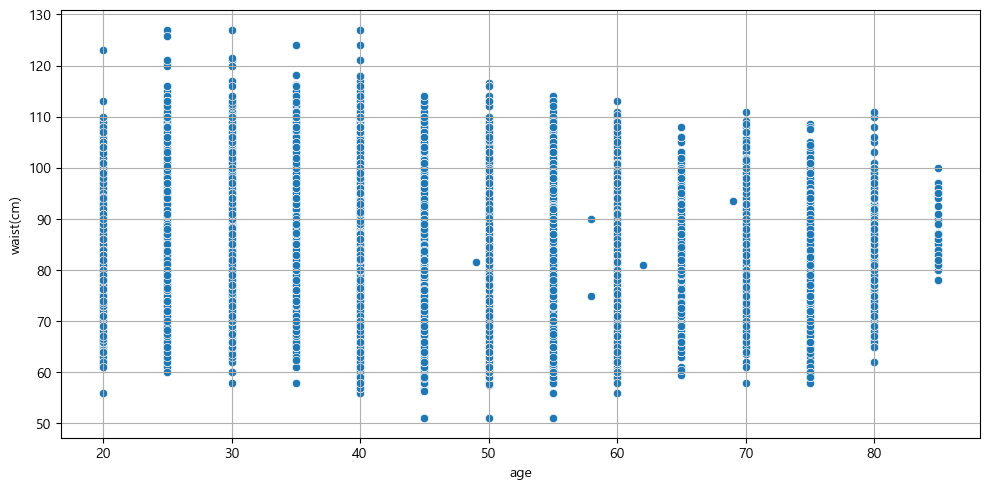

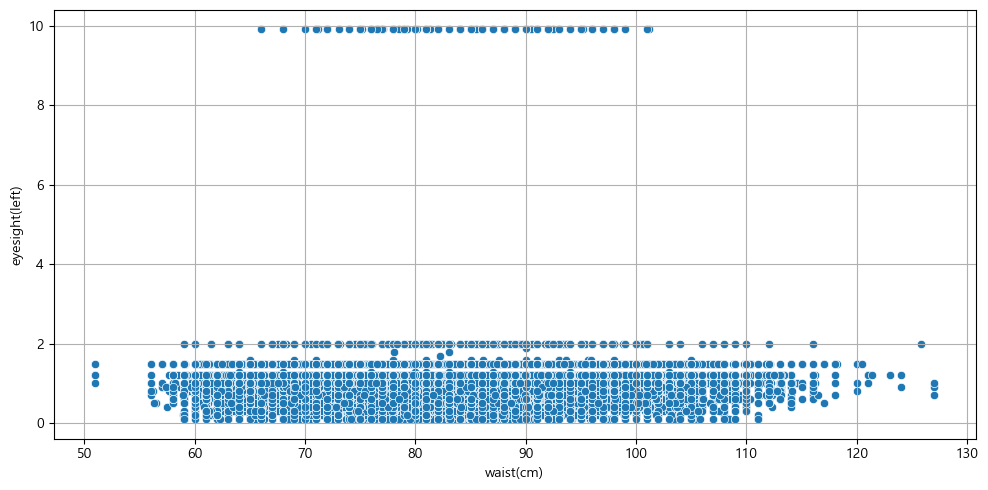

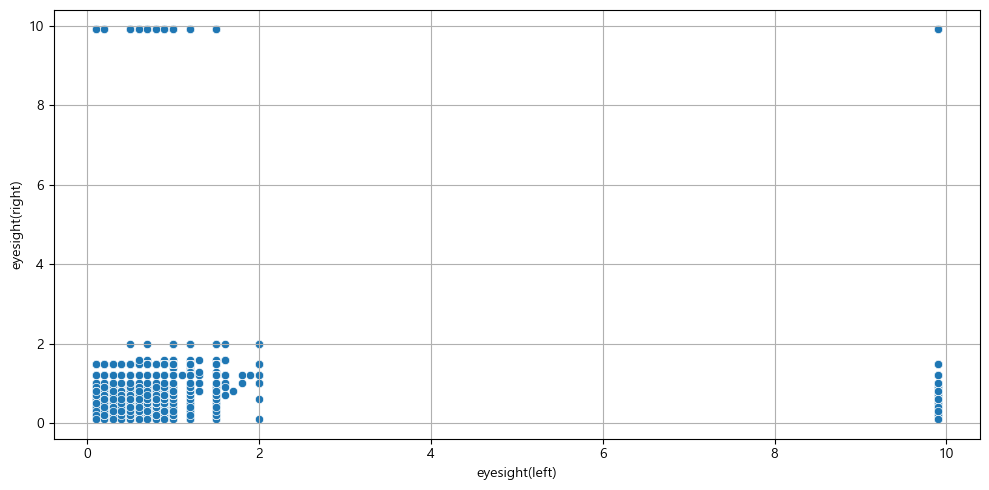

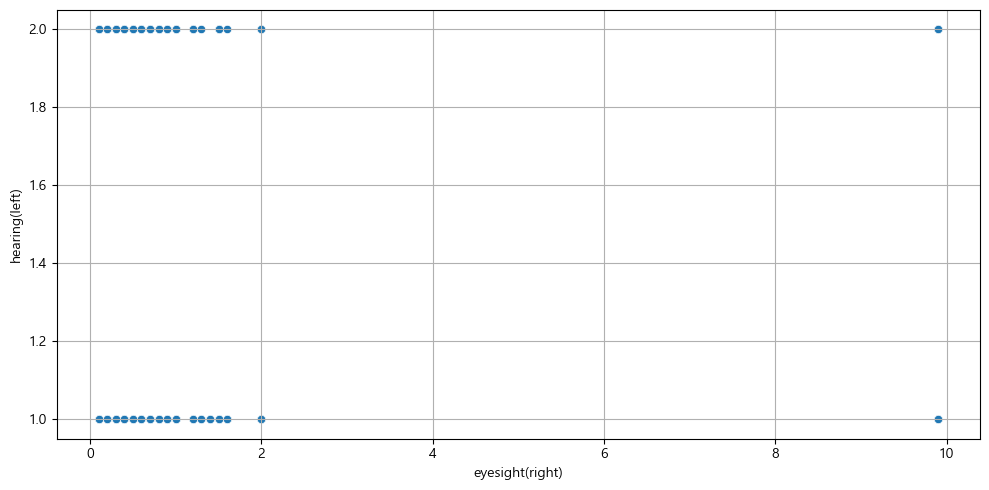

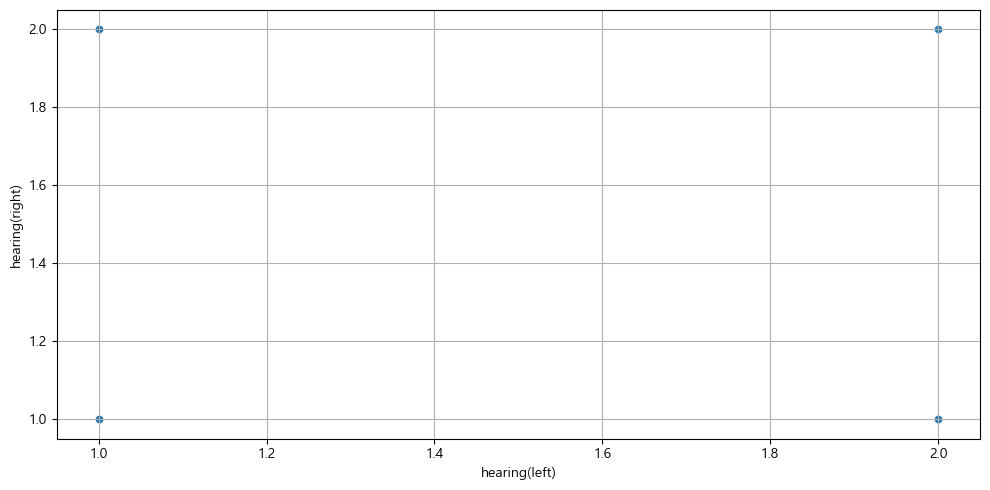

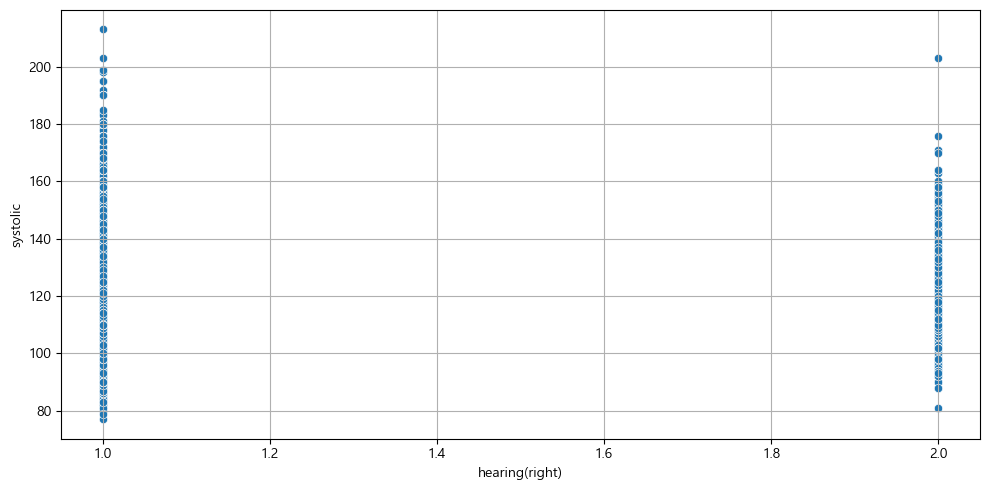

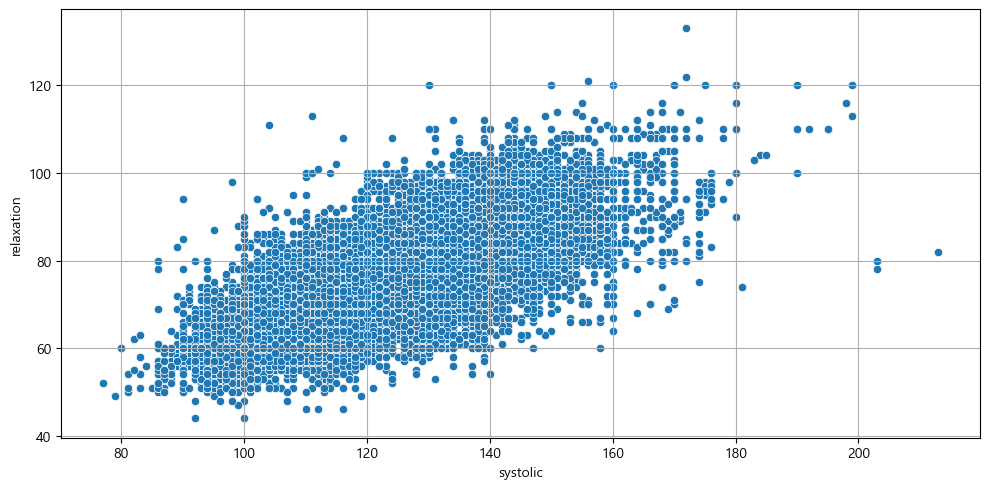

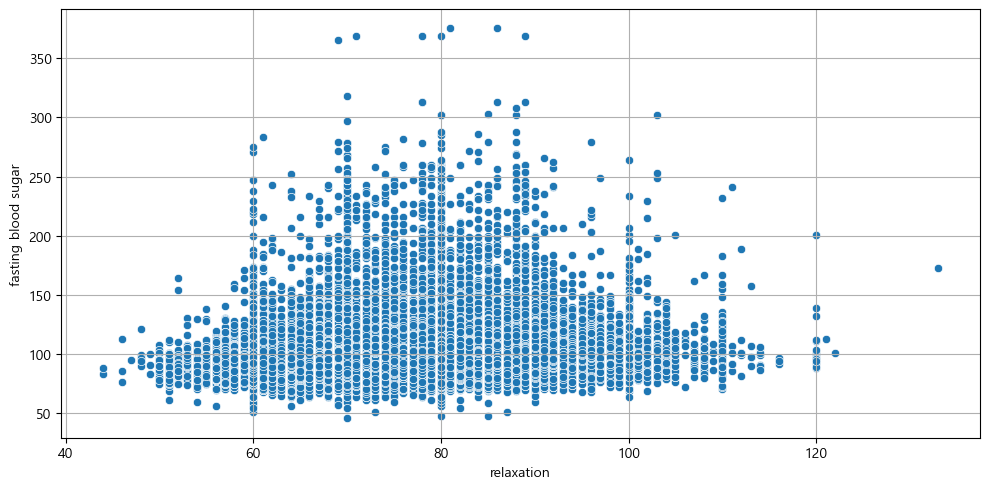

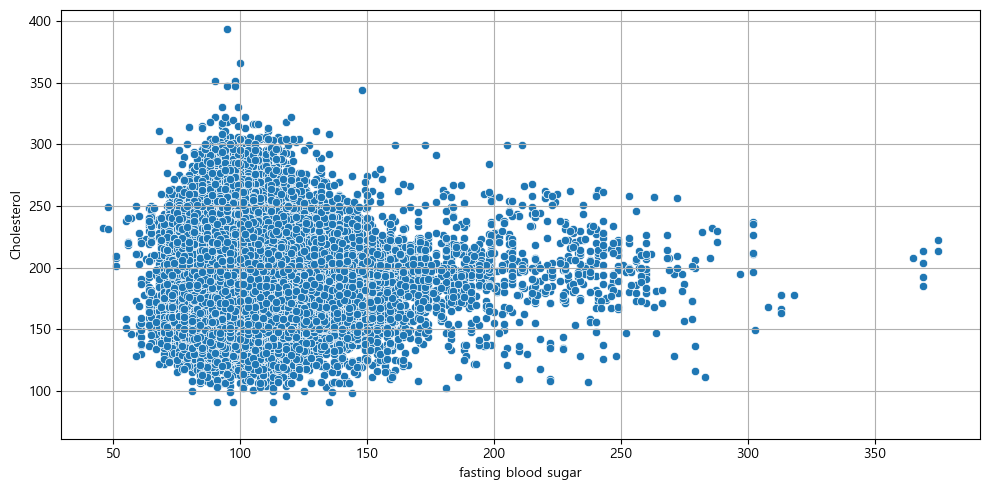

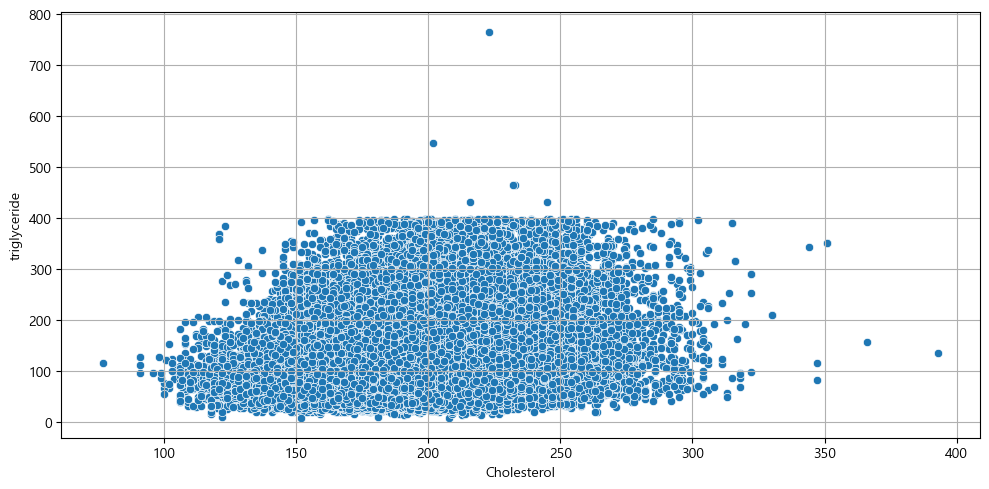

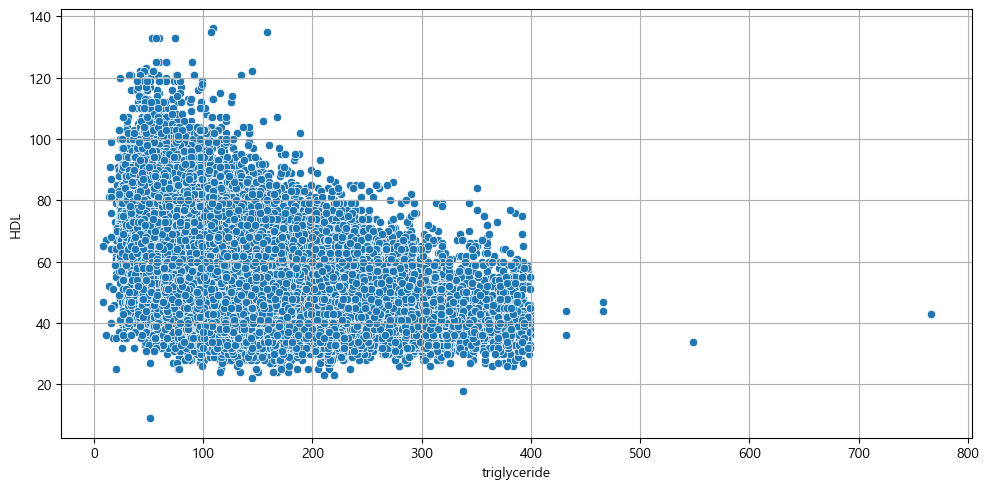

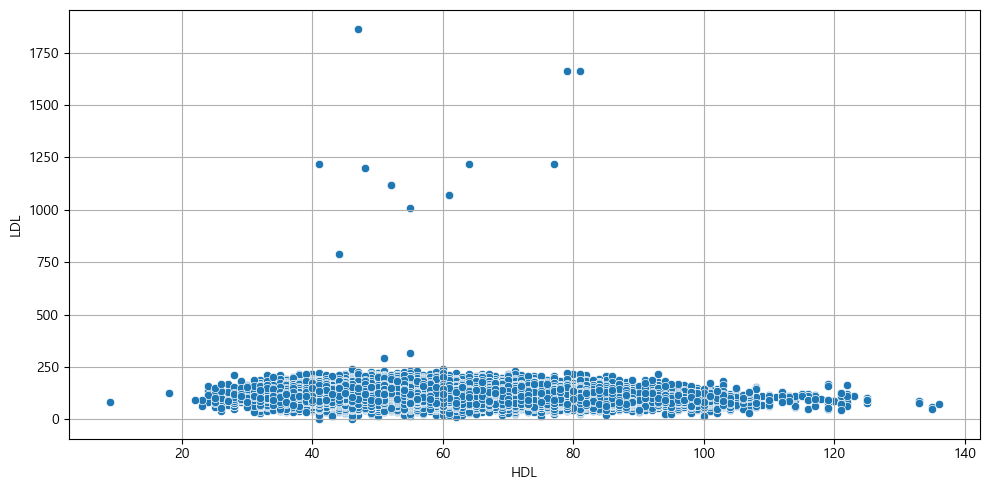

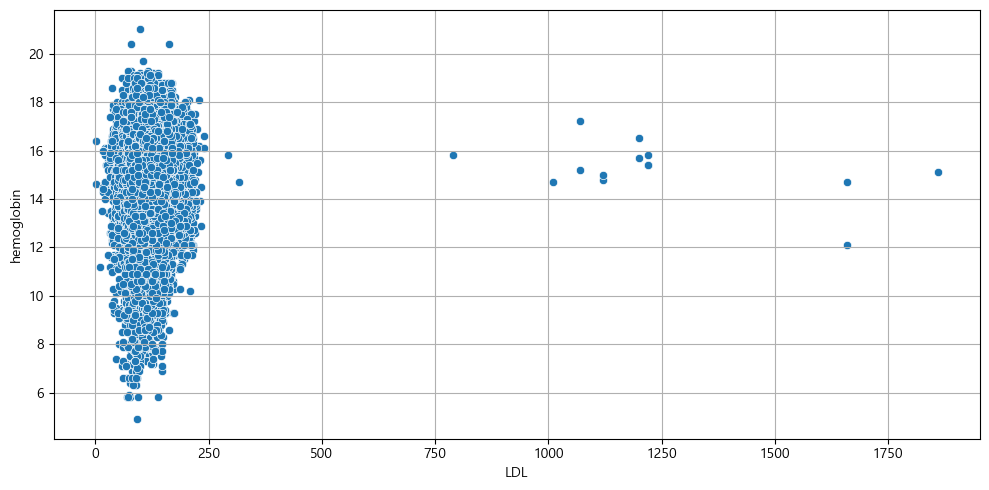

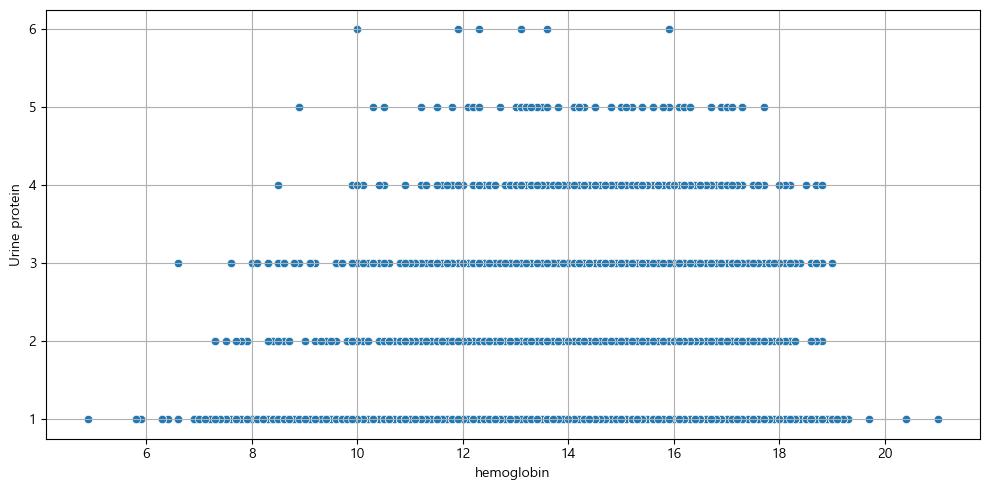

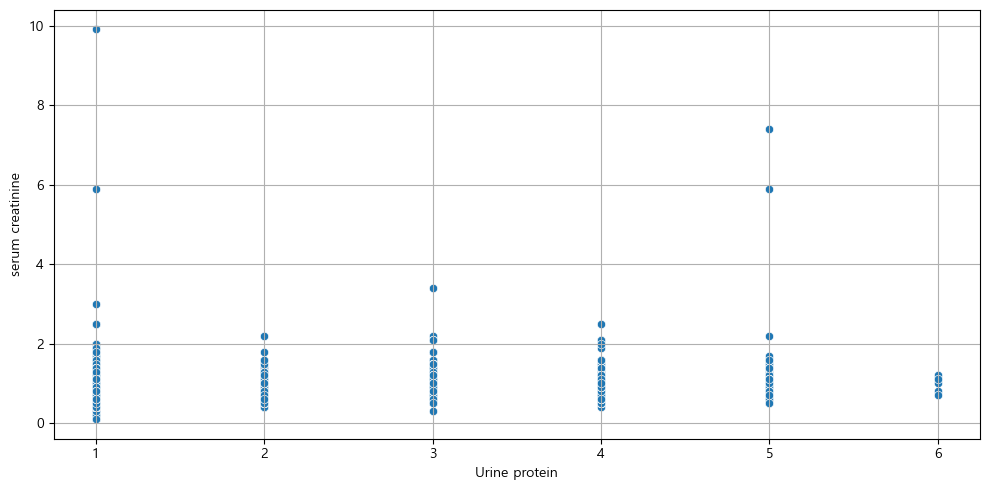

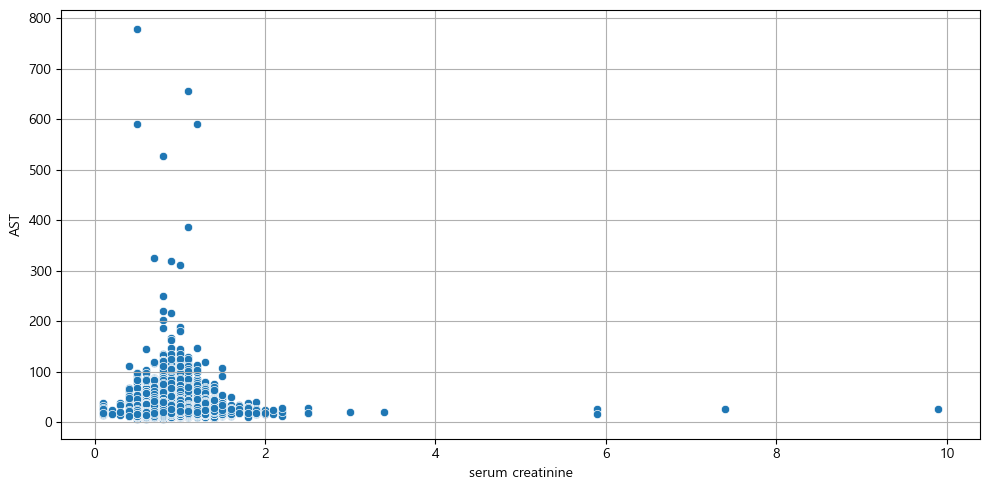

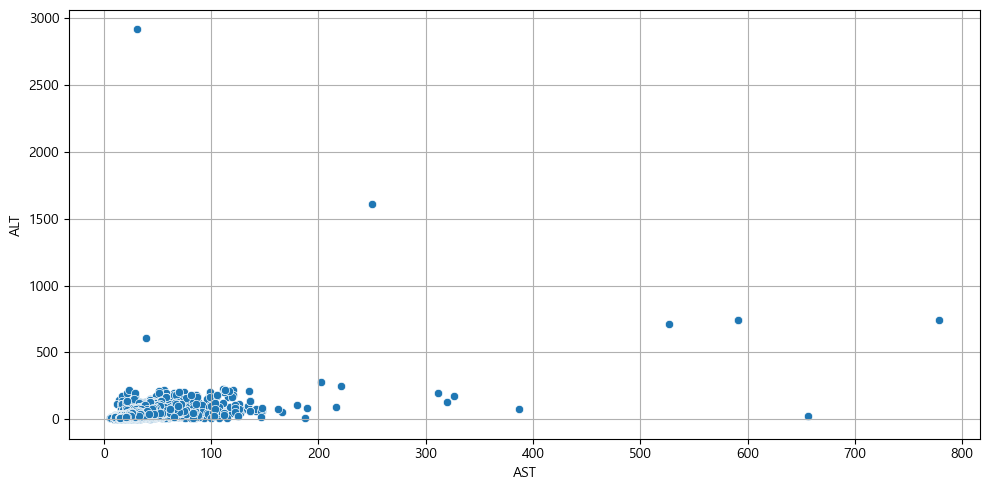

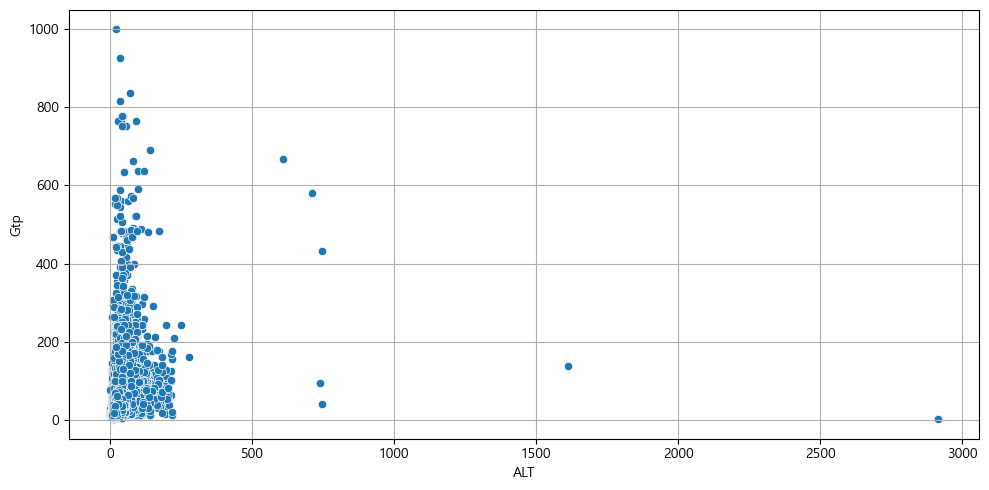

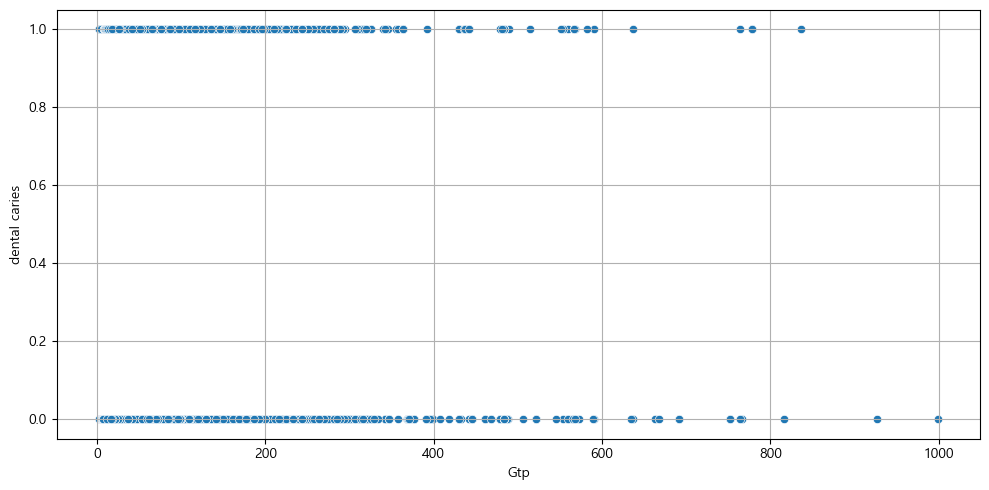

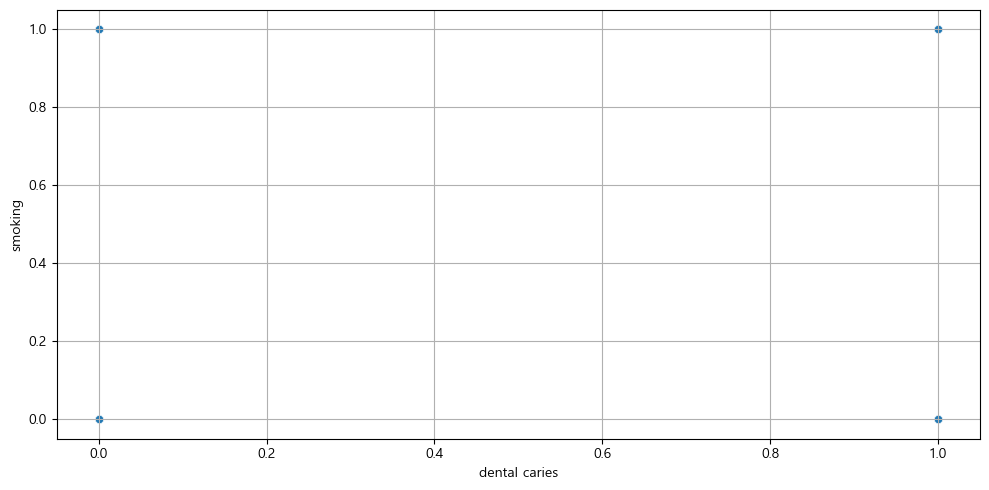

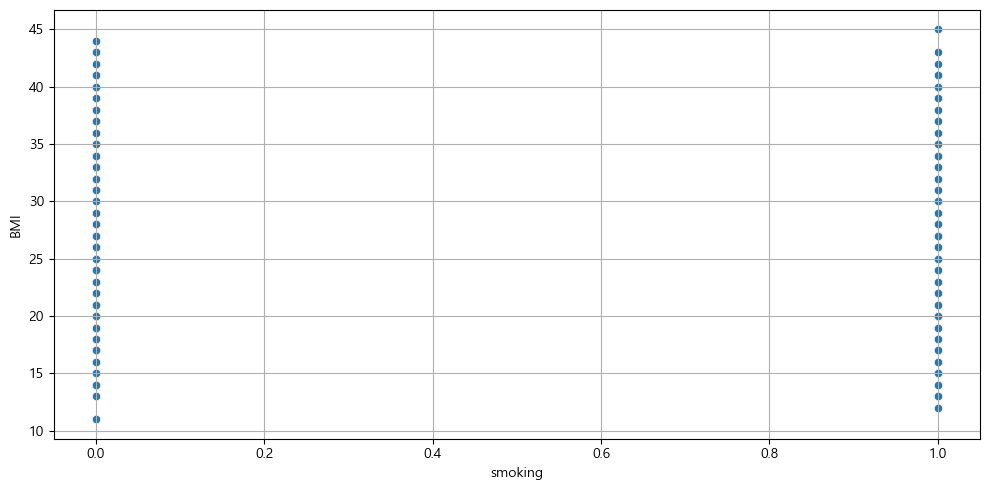

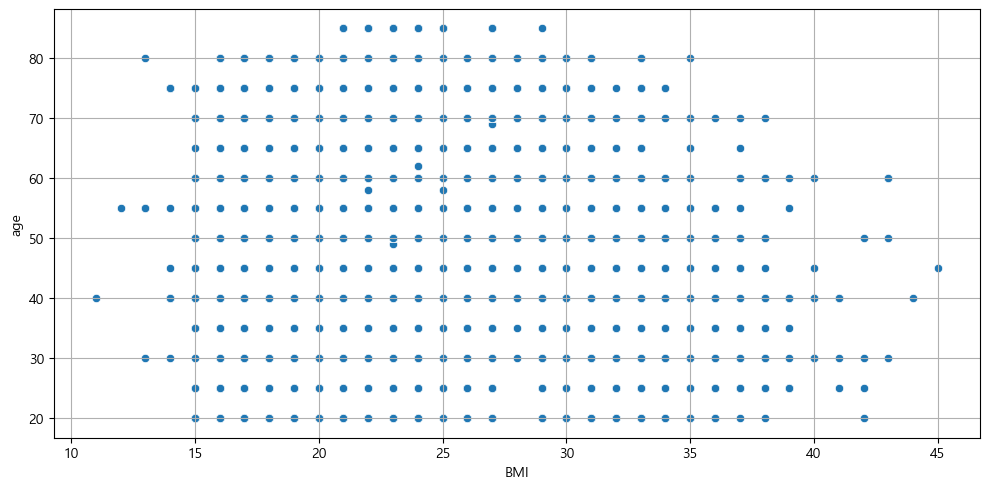

In [14]:
my_scatter_by_class(df)